In [4]:
!gdown --id '1qCHfycy91EyUFzilBvxu8hYVYp0l6jCh' --output /tmp/MidTerm_Dataset.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qCHfycy91EyUFzilBvxu8hYVYp0l6jCh
To: /tmp/MidTerm_Dataset.zip
100% 50.4M/50.4M [00:00<00:00, 268MB/s]


In [5]:
import os
import zipfile

local_zip = '/tmp/MidTerm_Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(path='/tmp')
zip_ref.close()


In [6]:
%cd ..
%cd tmp

/
/tmp


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 27, 27, 32)        416       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 flatten_9 (Flatten)         (None, 2304)             

<function matplotlib.pyplot.show(close=None, block=None)>

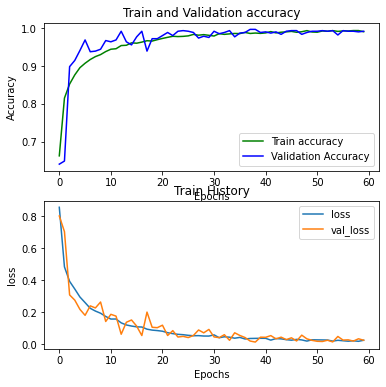

In [18]:
import os
import random
import numpy as np
import keras
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import load_model
from keras.utils import np_utils
from matplotlib import pyplot as plt

class_names = ['bolt','locatingpin','nut','washer']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}


def data_x_y_preprocess(datapath):
    #對資料進行預先處理
    img_row, img_col = 28,28  #定義圖片大小
    datapath = datapath  #訓練資料路徑
    data_x = np.zeros((28,28,3)).reshape(1,28,28,3) #讀取彩色圖片
    data_y = []
    num_class = 4  #四種螺絲
    for root, dirs, files in os.walk(datapath):
        #root為當前圖片之路徑
        print(root)
        for f in files:
            folder = (root.split("/")[-1])
            
            label = class_names_label[folder]
            #print('label=',label)，以0,1,2,3代表工件總類
            data_y.append(label)
            fullpath = os.path.join(root,f)#獲得圖片路徑
            img = Image.open(fullpath)
            img = img.resize((28,28)) #需取雙括號
            img = (np.array(img)/255).reshape(1,img_row,img_col,3) #讀取彩色圖片
            data_x = np.vstack((data_x,img))
    data_x = np.delete(data_x,[0],0)
    data_y = np_utils.to_categorical(data_y,num_class)

    return data_x,data_y
        
          
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2),input_shape=(28,28,3),activation='relu'))#第一層卷積層
model.add(MaxPooling2D(pool_size=(2,2)))#第一層池化層
model.add(Conv2D(64, (2,2), activation='relu'))#第二層卷積層
model.add(MaxPooling2D(pool_size=(2,2)))#第二層池化層
model.add(Dropout(0.1))#隨機斷開0.1的輸入神經元
model.add(Flatten())#展開
model.add(Dropout(0.1))#隨機斷開0.1的輸入神經元

model.add(Dense(128, activation='relu'))#全連接層
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax')) #units表示要分類的種類數量

model.summary()

#訓練模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("讀取檔案：")
data_train_X,data_train_Y = data_x_y_preprocess(r"/tmp/MidTerm_Dataset/Train")
train_history = model.fit(data_train_X, data_train_Y,
              batch_size=32, epochs=60,verbose=1,
              validation_split=0.1)
	       #batch_size表示一次訓練的張數
               #validation_split表示訓練時多少比例用來當Test
               #epochs表示訓練次數

#將Test圖片相關資訊用來對比獲得成績
print("讀取檔案：")
data_test_X,data_test_Y = data_x_y_preprocess(r"/tmp/MidTerm_Dataset/Test")
score = model.evaluate(data_test_X, data_test_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

#劃出Accuracy-Epochs圖
plt.rcParams["figure.figsize"] = (6,6)
plt.subplot(2,1,1)  #左側
plt.plot(train_history.history['accuracy'],color = 'g')
plt.plot(train_history.history['val_accuracy'],color = 'b')
plt.title('Train and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Validation Accuracy'], loc='lower right')
plt.show

#劃出loss-Epochs圖
plt.subplot(2,1,2)  #右側
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['loss','val_loss'], loc='upper right')
plt.show